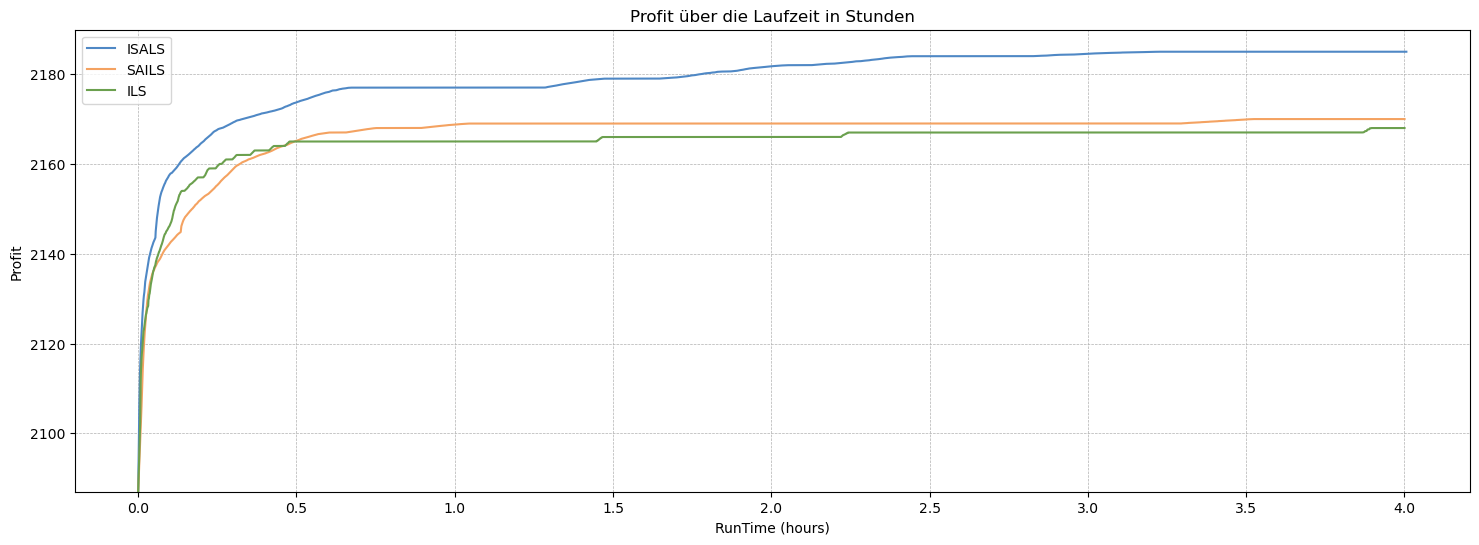

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV files list
csv_files = ['ISALS_7_8_1_profit_over_time.csv', 'SAILS_7_8_1_profit_over_time.csv', 'ILS_7_8_1_profit_over_time.csv']

# Read data from all CSV files and store them in a list of DataFrames
data_frames = []
algorithms = []

for file in csv_files:
    df = pd.read_csv(file)
    df['Hours'] = df['RunTime'] / 3600  # Convert RunTime from seconds to hours
    df['Timedelta'] = pd.to_timedelta(df['Hours'], unit='h')  # Convert hours to TimedeltaIndex
    df.set_index('Timedelta', inplace=True)  # Set Timedelta as the index
    df['Algorithm'] = file.split('_')[0]  # Add a column for the algorithm name
    data_frames.append(df)
    algorithms.append(df['Algorithm'].iloc[0])  # Store the algorithm name

# Calculate the minimum profit value across all data frames
min_profit = min(df['Profit'].min() for df in data_frames)

# Create the plot for profit over time for each CSV file
plt.figure(figsize=(18, 6))

# Define the custom muted colors for each algorithm
colors = {
    'ISALS': '#4f88c5',  # Muted blue
    'SAILS': '#f4a261',  # Muted orange
    'ILS': '#6ba04e'     # Muted green
}

for df in data_frames:
    # Smoothing the profit curve
    df['Profit_smoothed'] = df['Profit'].rolling(window=50, min_periods=1).mean()
    # Plot using the custom colors
    plt.plot(df.index.total_seconds() / 3600, df['Profit_smoothed'], label=df['Algorithm'].iloc[0], color=colors[df['Algorithm'].iloc[0]])

plt.xlabel('RunTime (hours)')
plt.ylabel('Profit')
plt.title('Profit über die Laufzeit in Stunden')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the y-axis lower limit to the lowest profit value found
plt.ylim(bottom=min_profit)

# Improved legend positioning
plt.legend(loc='best')

# Save the plot in both PNG and PDF formats
plt.savefig('profit_over_time_7_8_1.png', dpi=300)

# Display the plot
plt.show()

In [3]:
# Function to get the first data point after each 30-minute interval
def get_closest_intervals(df, intervals):
    df = df.sort_index()  # Ensure the DataFrame is sorted by time
    closest_points = []
    
    for interval in intervals:
        # Find the first row after the interval
        closest_point = df[df.index >= interval].iloc[0]
        closest_points.append(closest_point)
    
    return pd.DataFrame(closest_points)

# Create individual tables for each algorithm
for df, algorithm in zip(data_frames, algorithms):
    # Generate 30-minute intervals based on the maximum Timedelta in the data
    max_timedelta = df.index.max()
    intervals = pd.timedelta_range(start='0 days', end=max_timedelta, freq='30min')

    # Get the closest data points to the 30-minute intervals
    df_closest = get_closest_intervals(df, intervals).copy()

    # Calculate the profit growth
    df_closest['Profit Growth'] = df_closest['Profit'].diff()  # Calculate profit growth

    # Create hours from the intervals
    df_closest['Hours'] = df_closest.index.total_seconds() / 3600

    # Drop the first column with the date and time information


    # Display or save the table for the current algorithm
    print(f"\nProfit Table for Algorithm: {algorithm}")
    print(df_closest[['Hours', 'Profit', 'Profit Growth']])
    
    # Optionally save each table to a CSV file
    #df_closest[['Hours', 'Profit', 'Profit Growth']].to_csv(f'{algorithm}_profit_table.csv', index=False)


Profit Table for Algorithm: ISALS
                              Hours  Profit  Profit Growth
0 days 00:00:00            0.000000    2087            NaN
0 days 00:30:04.908444883  0.501363    2176           89.0
0 days 01:00:09.694802761  1.002693    2177            1.0
0 days 01:30:01.553633927  1.500432    2179            2.0
0 days 02:00:02.155392885  2.000599    2182            3.0
0 days 02:30:23.146217823  2.506430    2184            2.0
0 days 03:00:43.819223882  3.012172    2185            1.0
0 days 03:30:52.887542961  3.514691    2185            0.0
0 days 04:00:21.311474799  4.005920    2185            0.0

Profit Table for Algorithm: SAILS
                              Hours  Profit  Profit Growth
0 days 00:00:00            0.000000    2087            NaN
0 days 00:30:02.599880932  0.500722    2166           79.0
0 days 01:00:11.346478700  1.003152    2169            3.0
0 days 01:30:00.667176008  1.500185    2169            0.0
0 days 02:00:05.526326656  2.001535    2169  

In [4]:
# Function to get the first data point after each 10-minute interval in the first hour
def get_closest_intervals(df, intervals):
    df = df.sort_index()  # Ensure the DataFrame is sorted by time
    closest_points = []
    
    for interval in intervals:
        # Find the first row after the interval
        closest_point = df[df.index >= interval].iloc[0]
        closest_points.append(closest_point)
    
    return pd.DataFrame(closest_points)

# Create individual tables for each algorithm (only first hour, 10-minute intervals)
for df, algorithm in zip(data_frames, algorithms):
    # Generate 10-minute intervals for the first hour
    max_timedelta = pd.to_timedelta(1, unit='h')  # Only first hour
    intervals = pd.timedelta_range(start='0 days', end=max_timedelta, freq='10min')  # 10-minute intervals

    # Get the closest data points to the 10-minute intervals
    df_closest = get_closest_intervals(df, intervals).copy()

    # Calculate the profit growth
    df_closest['Profit Growth'] = df_closest['Profit'].diff()  # Calculate profit growth

    # Create minutes from the intervals
    df_closest['Minutes'] = df_closest.index.total_seconds() / 60  # Convert to minutes

    # Display or save the table for the current algorithm
    print(f"\nProfit Table for Algorithm (First Hour, 10-Min Intervals): {algorithm}")
    print(df_closest[['Minutes', 'Profit', 'Profit Growth']])
    
    # Optionally save each table to a CSV file
    #df_closest[['Hours', 'Profit', 'Profit Growth']].to_csv(f'{algorithm}_profit_table_10min_first_hour.csv', index=False)


Profit Table for Algorithm (First Hour, 10-Min Intervals): ISALS
                             Minutes  Profit  Profit Growth
0 days 00:00:00             0.000000    2087            NaN
0 days 00:10:03.887657882  10.064794    2165           78.0
0 days 00:20:04.540439842  20.075674    2171            6.0
0 days 00:30:04.908444883  30.081807    2176            5.0
0 days 00:40:01.210472821  40.020175    2177            1.0
0 days 00:50:11.015966893  50.183599    2177            0.0
0 days 01:00:09.694802761  60.161580    2177            0.0

Profit Table for Algorithm (First Hour, 10-Min Intervals): SAILS
                             Minutes  Profit  Profit Growth
0 days 00:00:00             0.000000    2087            NaN
0 days 00:10:08.140837908  10.135681    2153           66.0
0 days 00:20:04.135522840  20.068925    2162            9.0
0 days 00:30:02.599880932  30.043331    2166            4.0
0 days 00:40:03.937123776  40.065619    2168            2.0
0 days 00:50:05.444905995  5